In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# Parameters wanted:
   *  Mass, radius, orbital period, host star metallicity, eccentricity, equilibrium temperature.

In [6]:
file_US="/home/bolacha/University/Project/code/data2-example/selection_US.rdb"
file_EU="/home/bolacha/University/Project/code/data2-example/selection_EU.rdb"

In [7]:
file1=pd.read_csv(file_US, sep = '\t',header=[2])
file2=pd.read_csv(file_EU, sep = '\t',header=[2])
d_US, d_EU = pd.DataFrame(file1), pd.DataFrame(file2)
d_US,d_EU = d_US.iloc[1:,:45], d_EU.iloc[1:,:45]

d_US.rename(columns={"null": "Name", "null.1": "DB source", "null.2": "Discovery Method", "JUPITERMASS" : "Mp", "JUPITERMASS.1": "Mp_sini", "JUPITERRADIUS": "Rp", "DAY": "P", "AU":"a","null.3":"e","KELVIN":"Tstar", "null.4":"FeH","DEG":"i" },inplace=True)
d_EU.rename(columns={"null": "Name", "null.1": "DB source", "null.2": "Discovery Method", "JUPITERMASS" : "Mp", "JUPITERMASS.1": "Mp_sini", "JUPITERRADIUS": "Rp", "DAY": "P", "AU":"a","null.3":"e","KELVIN":"Tstar", "null.4":"FeH","DEG":"i"},inplace=True)

In [8]:
d_US=d_US[['Name','DB source', 'Discovery Method', 'Mp', 'Mp_sini', 'Rp','P','a','e','Tstar','FeH','i']]
d_US
#masses are in relation to Jupiter's mass, radius in relation to Jupiter's radius"
#Orbital period is is days, a in AU, i in degrees

,Name,DB source,Discovery Method,Mp,Mp_sini,Rp,P,a,e,Tstar,FeH,i
1,CoRoT-12 b,Nasa Exoplanet Archive,Transit,0.917,NaN,1.44,2.828042,0.04016,0.07,5675.0,0.16,85.48
2,CoRoT-18 b,Nasa Exoplanet Archive,Transit,3.47,NaN,1.31,1.9000693,0.0295,0.08,5440.0,-0.10,86.50
3,HD 4208 b,Nasa Exoplanet Archive,Radial Velocity,0.81,0.81,NaN,832.97,1.662,0.042,5717.0,-0.28,NaN
4,HD 4313 b,Nasa Exoplanet Archive,Radial Velocity,1.927,1.927,NaN,356.21,1.157,0.147,4943.0,NaN,NaN
5,HD 50499 b,Nasa Exoplanet Archive,Radial Velocity,1.636,1.636,NaN,2447.1,3.833,0.266,6102.0,0.26,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4005,Kepler-248 c,Nasa Exoplanet Archive,Transit,NaN,NaN,0.363,16.239494,0.123,NaN,5190.0,NaN,NaN
4006,HD 34445 e,Nasa Exoplanet Archive,Radial Velocity,0.0529,0.0529,NaN,49.175,0.2687,0.09,5879.0,0.18,NaN
4007,HD 114783 c,Nasa Exoplanet Archive,Radial Velocity,0.611,0.611,NaN,4319,NaN,0,5135.0,0.21,NaN
4008,HR 858 b,Nasa Exoplanet Archive,Transit,NaN,NaN,0.186,3.58599,0.048,0.3,6201.0,-0.14,85.50


Below I'll be plotting relations between features. They have NaN values for different indices, so direct comparison can only be done where both of those parameters have numerical values. To perform that comparison I wrote two small functions, which are in in the next cell.

The choice of said features is crucial in this study, so have a better general idea of our data, I'll first try to understand the main planetary parameters' range, plotting some histograms.

In [9]:
def removenans(p1,typ=float):
    "takes a parameter and the type of its numerical elements (no second input sets it to float)"
    "returns NaN-free parameter tuple and its indexes on the original list"
    l = np.array([])
    for i in range(1,len(p1)):
        if (type(p1[i])!=typ):
            l=np.append(l,i)
    return p1[l], l 

def compare_parameters(p1,p2):
    "takes two parameters, returns same parameters NaN-free for the same planets"
    p1, ind1 = removenans(p1)
    p2, ind2 = removenans(p2)
    l = np.array([])
    for i,index1 in enumerate(ind1):
        for j, index2 in enumerate(ind2):
           if index1 == index2:
            l = np.append(l,index1)
    return p1[l], p2[l]

In [10]:
M_US1,P_US1 = compare_parameters(pd.to_numeric(d_US.Mp),pd.to_numeric(d_US.P))
M_EU1, P_EU1 = compare_parameters(pd.to_numeric(d_EU.Mp), pd.to_numeric(d_EU.P))

M_US2,R_US2 = compare_parameters(pd.to_numeric(d_US.Mp),pd.to_numeric(d_US.Rp))
M_EU2, R_EU2 = compare_parameters(pd.to_numeric(d_EU.Mp), pd.to_numeric(d_EU.Rp))

#Even though mass is in both comparisons, R and P very likely has different places with NaN 
#values so the two mass lists are different, hence naming it differently. I'll adress
#numbers in the order of comparisons/graphs I plot.

print(r"Max M_US",np.max(M_US1),r"Max P_US",np.max(P_US1),r"Max R_US",np.max(R_US2))
print(r"Max M_EU",np.max(M_EU1),r"Max P_EU",np.max(P_EU1),r"Max R_EU",np.max(R_EU2))

Max M_US 55.59 Max P_US 7300000.0 Max R_US 6.9
Max M_EU 81.9 Max P_EU 730000.0 Max R_EU 6.52


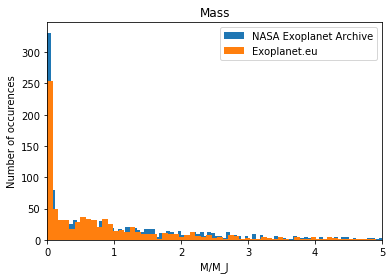

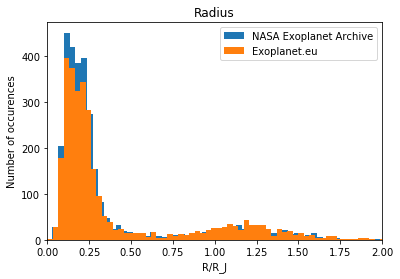

In [29]:
#M and R histograms
params_US = [M_US1, R_US2]
params_EU = [M_EU1, R_EU2]
lims, b = [5, 2], [1000, 200]
titles = ["Mass","Radius"], 
names = [r"M/M_J",r"R/R_J"]

for i in range(len(params_US)):
    plt.hist(params_US[i],bins = b[i],label = "NASA Exoplanet Archive")
    plt.hist(params_EU[i], bins = b[i], label="Exoplanet.eu")
    plt.ylabel("Number of occurences")
    plt.xlabel(names[i])
    plt.xlim(0, lims[i])
    plt.title(titles[i])
    plt.legend()
    plt.show()

In [ ]:
#P histogram - needs lots of bins, runs slowly
plt.hist(P_US1,bins = 70000,label = "NASA Exoplanet Archive")
plt.hist(P_EU1, bins = 50000, label="Exoplanet.eu")
plt.ylabel("Number of occurences")
plt.xlabel("P (days)")
plt.xlim(0, 400)
plt.title("Orbital Period")
plt.legend()
plt.show()

<u>Conclusions:</u>
* <b>Mass</b>: It was seen that most planets are within $1 M_J$, namely in the $\leq 0.3 M_J$ margin. There is a sharp decrease in number of occurences between $0.2$ and $0.3 M_J$, then a slow and continuous descend after that.

* <b>Radius</b>: One can also observe that most planets are within $0.5 R_J$, however, in this case there are two scatistically relevant regions, the first peaking at about $0.2 \sim R_J$ and the second at $1.25 \sim R_J$.

* <b>Orbital period</b>: For orbital period, a great majority ($\sim 90 \%$ ) of planets have orbital periods inferior to 100 days.

Now we can start visualizing the relationship between these quantities. 

We first aim to find three separate groups:
* Hot jupiters: P $\lesssim 7$ d, $M/M_J \leq 12$; centered around $\sim 1 M_J$ and $P \sim 3$ d; 
* Eccentric giants: $10^2 d \lesssim P \lesssim 10^4 d$; $1 \lesssim M/M_J \leq 10$.
* Ungiants: $P \leq 100 d$; $ M/M_J \lesssim 0.07$ and $R \lesssim 0.35 R_J$

$\rightarrow$ <u>Task 1:</u>  plottting mass vs period.

# mass vs orbital period

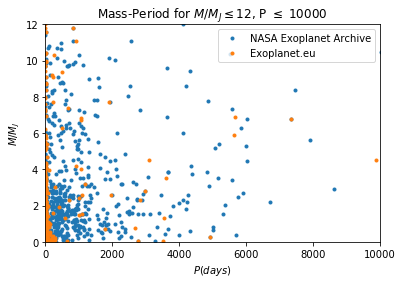

In [37]:
M,P=12,10000
plt.plot(P_US1, M_US1,'.',label = "NASA Exoplanet Archive")
plt.plot(P_EU1, M_EU1, '.',label = "Exoplanet.eu")
plt.ylabel(r"$M/M_J$")
plt.ylim(0,M)
plt.xlim(0,P)
plt.xlabel(r"$P (days)$")
plt.legend()
plt.title(r"Mass-Period for $M/M_J \leq${}, P $\leq$ {}".format(M,P))
plt.show()

Which is a first visualization for the relationship between orbital period and mass, in the full range we're first studying.

We can already see, for example, an interesting population of planets with orbital periods close to a few days. 

Limiting our range according to the groups we established:

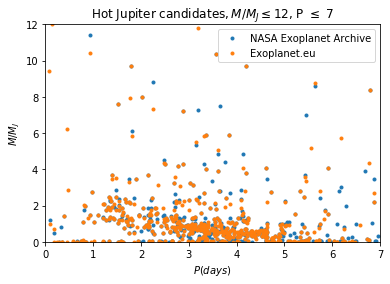

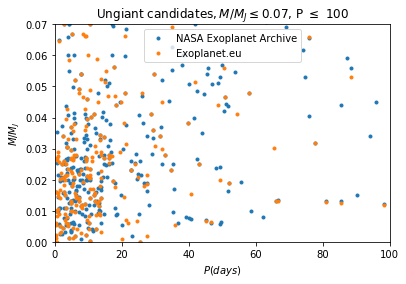

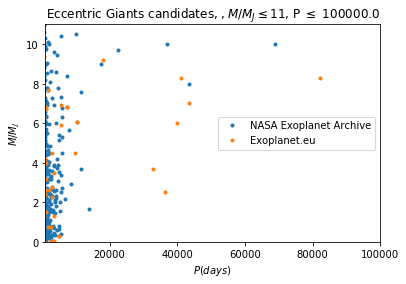

In [64]:
Ms=[12,0.07,11]
Ps=[7,100,10e4]
lim=[(0,7),(0,100),(10e2,10e4)]
titles=["Hot Jupiter candidates","Ungiant candidates","Eccentric Giants candidates, "]
for i in range(len(Ms)):
    plt.plot(P_US1, M_US1,'.',label = "NASA Exoplanet Archive")
    plt.plot(P_EU1, M_EU1, '.',label = "Exoplanet.eu")
    plt.ylabel(r"$M/M_J$")
    plt.ylim(0,Ms[i])
    plt.xlim(lim[i])
    plt.xlabel(r"$P (days)$")
    plt.title(titles[i]+r"$, M/M_J \leq${}, P $\leq$ {}".format(Ms[i],Ps[i]))
    plt.legend()
    plt.show()

# mass-radius-temperature

To calculate $T_{eq}$, one needs a further parameter, the planet's bond Albedo $A_B$:
\begin{equation}
T_{e q}=T_{\text {star}} \sqrt{\frac{R}{2 a}}\left(1-A_{B}\right)^{1 / 4}
\end{equation}


I'll first plot radius-mass.

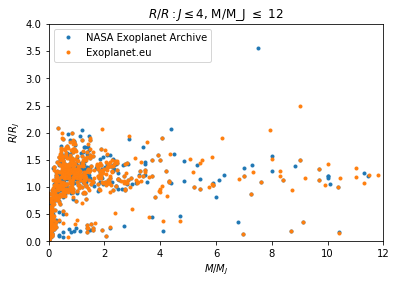

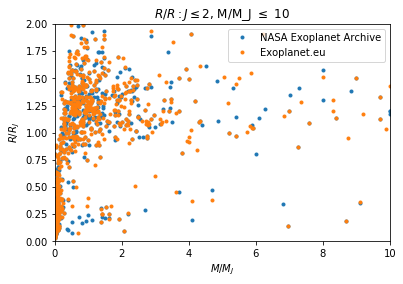

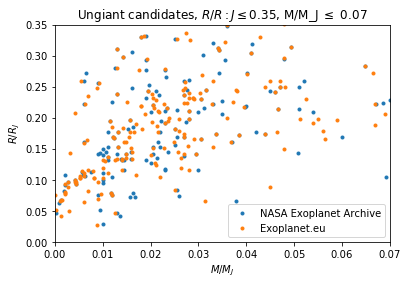

In [16]:
Ms=[12,10,0.07]
Rs=[4,2,0.35]
titles=["","","Ungiant candidates, "]
for i in range(len(Ms)):
    plt.plot(M_US2, R_US2, '.' ,label = "NASA Exoplanet Archive")
    plt.plot(M_EU2, R_EU2, '.' ,label = "Exoplanet.eu")
    plt.xlabel(r"$M/M_J$")
    plt.xlim(0,Ms[i])
    plt.ylim(0,Rs[i])
    plt.ylabel(r"$R/R_J$")
    plt.legend()
    plt.title(titles[i]+r"$R/R:J \leq${}, M/M_J $\leq$ {}".format(Rs[i],Ms[i]))
    plt.show()